In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/ML/Downloads/Mall_Customers - Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [13]:
X = df.iloc[:,[3,4]].values

In [15]:
from sklearn.cluster import KMeans

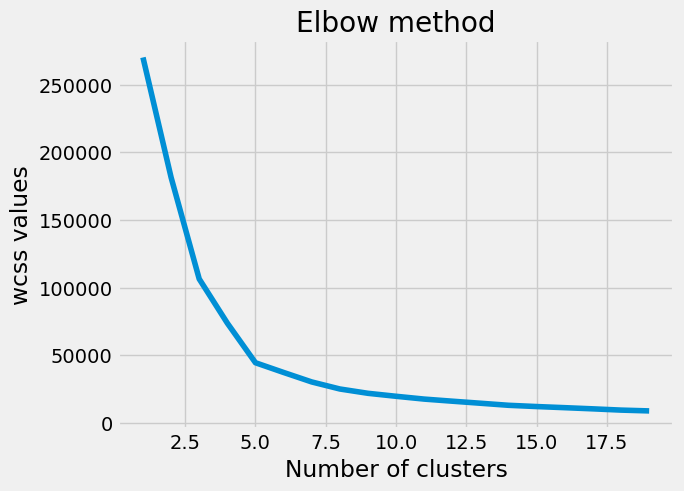

In [25]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss values')
plt.show()

In [29]:
kmeans = KMeans(n_clusters =5,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans

KMeans(n_clusters=5, n_init=10, random_state=0)

In [31]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=300, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()